В данном домашнем задании предлагается воспользоваться полученными знаниями о numpy, pandas, jupyter и средствах визуализации. Для этого необходимо выбрать из каталога любой интересующий dataset и провести его анализ в вольном стиле
# Часть 1

In [1]:
import pandas as pd
import numpy as np
!wget 'https://archive.ics.uci.edu/static/public/2/data.csv'

--2025-07-09 17:11:38--  https://archive.ics.uci.edu/static/public/2/data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.csv’

data.csv                [   <=>              ]   5.10M  10.0MB/s    in 0.5s    

2025-07-09 17:11:39 (10.0 MB/s) - ‘data.csv’ saved [5347052]



In [2]:
data = pd.read_csv("data.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?

In [3]:
data['sex'].value_counts()

,count
sex,
Male,32650
Female,16192


Каков средний возраст (признак age) женщин?

In [4]:
round(data[data['sex'] == 'Female']['age'].mean(), 2)

np.float64(36.93)

Какова доля граждан Германии (признак native-country)?

In [5]:
(float((data['native-country'] == 'Germany').sum()) / data.shape[0]) * 100

0.421768150362393

Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак ~~salary~~ income) и тех, кто получает менее 50K в год?


In [6]:
higher = data[(data['income'] == '>50K') | (data['income'] == '>50K.')]['age']
lower = data[(data['income'] == '<=50K') | (data['income'] == '<=50K.')]['age']
print(f"Заработок\tСредний возраст\tКвадратичное отклонение\n >50K:\t\t{round(higher.mean())}\t\t {round(higher.std(), 1)}\n <50K:\t\t{round(lower.mean())}\t\t {round(lower.std(), 1)}")

Заработок	Средний возраст	Квадратичное отклонение
 >50K:		44		 10.6
 <50K:		37		 14.1


Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [7]:
data[(data['income'] == '>50K') | (data['income'] == '>50K.')]['education'].unique() # Ответ - нет

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th', 'Preschool'],
      dtype=object)

Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.

In [8]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print(f'Раса: {race}, пол: {sex}')
    print(sub_df['age'].describe())

Раса: Amer-Indian-Eskimo, пол: Female
count    185.000000
mean      36.237838
std       12.840056
min       17.000000
25%       26.000000
50%       35.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Раса: Amer-Indian-Eskimo, пол: Male
count    285.000000
mean      36.989474
std       11.703943
min       17.000000
25%       29.000000
50%       35.000000
75%       44.000000
max       82.000000
Name: age, dtype: float64
Раса: Asian-Pac-Islander, пол: Female
count    517.000000
mean      35.657640
std       12.637799
min       17.000000
25%       25.000000
50%       34.000000
75%       44.000000
max       81.000000
Name: age, dtype: float64
Раса: Asian-Pac-Islander, пол: Male
count    1002.000000
mean       38.994012
std        12.824878
min        18.000000
25%        29.000000
50%        37.000000
75%        46.000000
max        90.000000
Name: age, dtype: float64
Раса: Black, пол: Female
count    2308.000000
mean       37.905979
std        12.736001
min        1

Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [9]:
data['marital-status'].value_counts() # Смотрим какие вообще есть

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [10]:
data[(data['sex'] == 'Male') & (data['marital-status'].isin(['Never-married', 'Separated', 'Divorced']))]['income'].value_counts()

,count
income,
<=50K,7423
<=50K.,3765
>50K,658
>50K.,284


In [11]:
data[(data['sex'] == 'Male') & (data['marital-status'].str.startswith('Married'))]['income'].value_counts()

,count
income,
<=50K,7576
>50K,5965
<=50K.,3742
>50K.,2952


Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?

In [12]:
maximum_hours = data['hours-per-week'].max()
print(f"Максимум часов: {maximum_hours}")
people_with_max_hours = len(data[data['hours-per-week'] == maximum_hours])
print(f"Количество людей с такими часами: {people_with_max_hours}")
print(f"Из них зарабатывают много: {round(len(data[(data['hours-per-week'] == maximum_hours) & ((data['income'] == '>50K') | (data['income'] == '>50K.'))]) / people_with_max_hours * 100, 2)}%")

Максимум часов: 99
Количество людей с такими часами: 137
Из них зарабатывают много: 29.93%


Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [13]:
pd.crosstab(data['native-country'],
            data['income'],
            values=data['hours-per-week'],
            aggfunc=np.mean).T

/tmp/ipython-input-13-526114309.py:1: FutureWarning: The provided callable <function mean at 0x7dc2b09da3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.crosstab(data['native-country'],


native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
income,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.156250,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
<=50K.,NaN,40.714286,36.189189,35.451613,40.166667,41.705882,39.800000,37.800000,35.382979,36.050000,...,40.227273,39.629032,42.222222,42.903226,41.250000,43.300000,42.500000,38.852859,40.235294,32.4
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.437500,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
>50K.,NaN,57.500000,46.916667,45.937500,62.500000,44.000000,40.000000,46.000000,36.500000,49.411765,...,49.375000,40.625000,NaN,51.250000,41.333333,45.000000,NaN,45.403633,40.000000,25.0


In [18]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

<Axes: xlabel='marital-status', ylabel='count'>

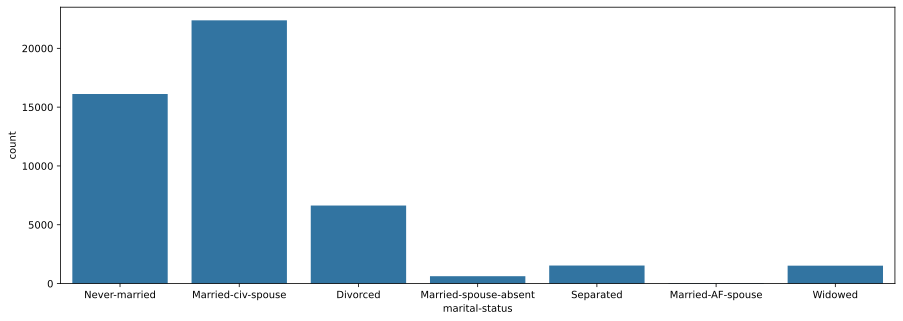

In [19]:
sns.countplot(x = 'marital-status', data = data)

<Axes: xlabel='marital-status', ylabel='count'>

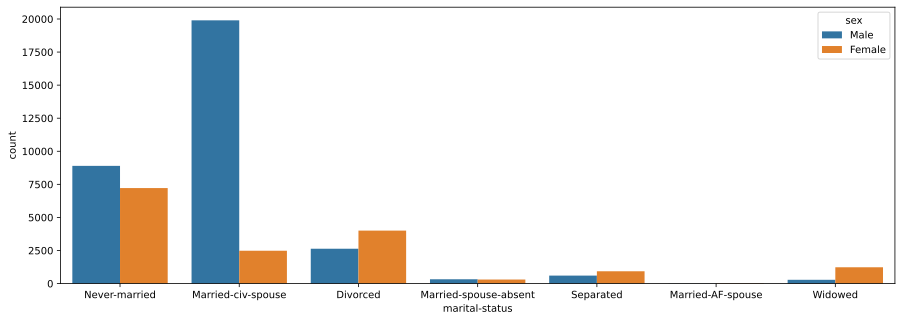

In [20]:
sns.countplot(x = 'marital-status', hue = 'sex', data = data)

<Axes: xlabel='marital-status', ylabel='count'>

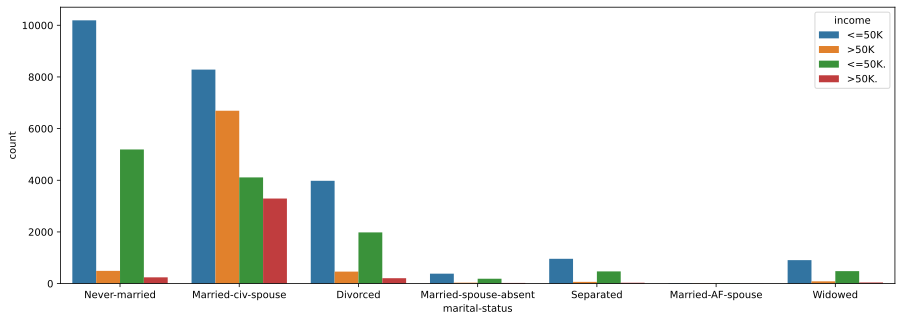

In [22]:
sns.countplot(x = 'marital-status', hue = 'income', data = data)

<Axes: title={'center': 'Average Hours Worked per Week by Education Level'}, xlabel='education'>

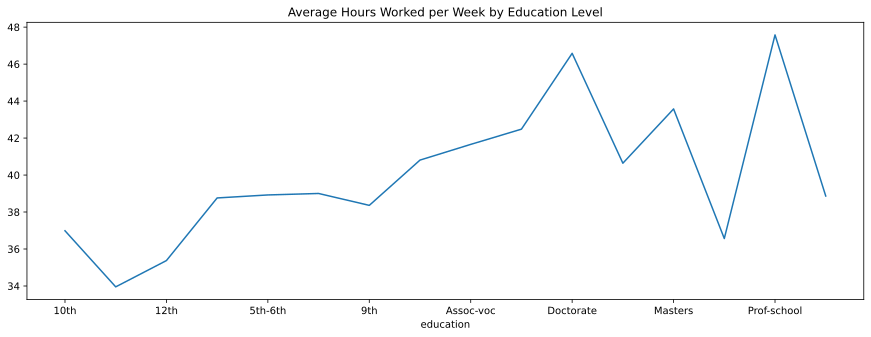

In [28]:
data.groupby('education')['hours-per-week'].mean().plot(title='Average Hours Worked per Week by Education Level')

Text(0, 0.5, '')

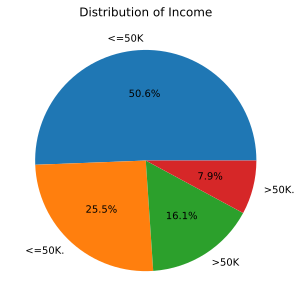

In [34]:
data['income'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Distribution of Income')
plt.ylabel('')

Text(0, 0.5, '')

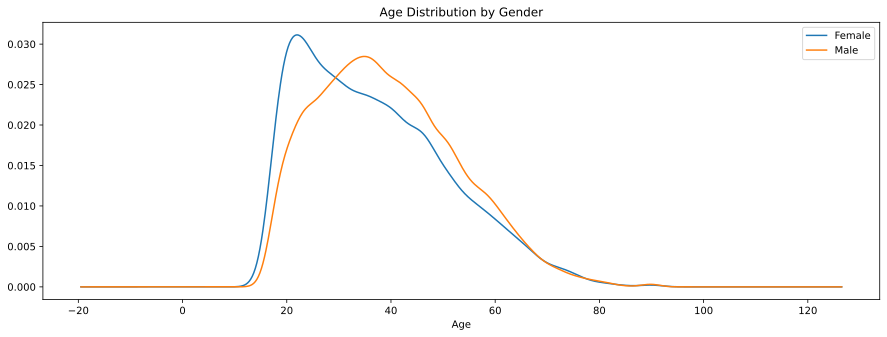

In [38]:
data.groupby('sex')['age'].plot(kind='kde', legend=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('')

Text(0, 0.5, 'Amount ($)')

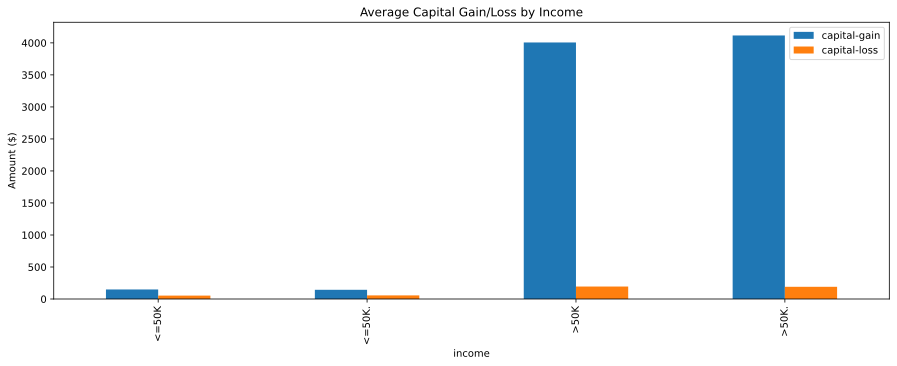

In [39]:
data.groupby('income')[['capital-gain', 'capital-loss']].mean().plot(kind='bar', title='Average Capital Gain/Loss by Income')
plt.ylabel('Amount ($)')